<a href="https://colab.research.google.com/github/Bustagar/APRENDIZAJE-AUTOMATICO-1/blob/main/TP2_AA1_aprendizaje_no_supervisado(Resuelto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

🧑 Juan Sebastian Bustamante Garcia

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

## Dataset elegido: https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

## Ausentismo laboral:

## Descripción de variables

1. Identificación individual (ID)
2. Razón de ausencia (ICD)
Ausencias certificadas por el Código Internacional de Enfermedades (ICD) estratificadas en 21 categorías (I a XXI) de la siguiente manera:

I. Ciertas enfermedades infecciosas y parasitarias II. Neoplasias III. Enfermedades de la sangre y órganos hematopoyéticos, y ciertos trastornos que afectan el sistema inmunológico IV. Enfermedades endocrinas, nutricionales y metabólicas V. Trastornos mentales y del comportamiento VI. Enfermedades del sistema nervioso VII. Enfermedades del ojo y sus anexos VIII. Enfermedades del oído y de la apófisis mastoidea IX. Enfermedades del sistema circulatorio X. Enfermedades del sistema respiratorio XI. Enfermedades del sistema digestivo XII. Enfermedades de la piel y del tejido subcutáneo XIII. Enfermedades del sistema musculoesquelético y del tejido conjuntivo XIV. Enfermedades del sistema genitourinario XV. Embarazo, parto y puerperio XVI. Ciertas condiciones originadas en el período perinatal XVII. Malformaciones congénitas, deformaciones y anomalías cromosómicas XVIII. Síntomas, signos y hallazgos clínicos y de laboratorio anormales no clasificados en otra parte XIX. Lesiones, envenenamientos y ciertas otras consecuencias de causas externas XX. Causas externas de morbilidad y mortalidad XXI. Factores que influyen en el estado de salud y contacto con los servicios de salud

Y 7 categorías sin seguimiento de pacientes (CID):

Consulta médica (22)

Donación de sangre (23)

Análisis de laboratorio (24)

Ausencia injustificada (25)

Fisioterapia (26)

Consulta dental (27)

3. Mes de ausencia
4. Día de la semana (Lunes (2), Martes (3), Miércoles (4), Jueves (5), Viernes (6))
5. Estaciones
6. Gasto en transporte
7. Distancia de la residencia al trabajo (kilómetros)
8. Tiempo de servicio
9. Edad
10. Carga laboral promedio/día
11. Objetivo alcanzado
12. Falla disciplinaria (sí=1; no=0)
13. Educación (Secundaria (1), Pregrado (2), Posgrado (3), Maestría y doctorado (4))
14. Hijo/a (número de hijos/as)
15. Bebedor social (sí=1; no=0)
16. Fumador social (sí=1; no=0)
17. Mascota (número de mascotas)
18. Peso
19. Altura
20. Índice de masa corporal
21. Tiempo de ausentismo en horas (variable objetivo)

### Carga del dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "https://raw.githubusercontent.com/Bustagar/APRENDIZAJE-AUTOMATICO-1/refs/heads/main/Absenteeism_at_work.csv"

df = pd.read_csv(url, sep=';')
df.sample(5)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
181,28,28,3,6,3,225,26,9,28,343.253,...,0,1,1,0,0,2,69,169,24,2
451,5,26,6,3,3,235,20,13,43,253.957,...,0,1,1,1,0,0,106,167,38,8
89,14,6,11,6,4,155,12,14,34,306.345,...,0,1,2,1,0,0,95,196,25,8
645,3,27,3,6,2,179,51,18,38,222.196,...,0,1,0,1,0,0,89,170,31,3
474,10,22,7,6,1,361,52,3,28,230.290,...,0,1,1,1,0,4,80,172,27,8


## Renombramos las columnas para mejor entendimiento

In [3]:
df.rename({
    'ID': 'Id',
    'Reason for absence': 'Razón de ausencia',
    'Month of absence': 'Mes de ausencia',
    'Day of the week': 'Día de la semana',
    'Seasons': 'Estaciones',
    'Transportation expense': 'Gasto en transporte',
    'Distance from Residence to Work': 'Distancia de la residencia al trabajo',
    'Service time': 'Tiempo de servicio',
    'Age': 'Edad',
    'Work load Average/day ': 'Carga laboral promedio/día',
    'Hit target': 'Objetivo alcanzado',
    'Disciplinary failure': 'Falla disciplinaria',
    'Education': 'Educación',
    'Son': 'Hijo/a',
    'Social drinker': 'Bebedor social',
    'Social smoker': 'Fumador social',
    'Pet': 'Mascota',
    'Weight': 'Peso',
    'Height': 'Altura',
    'Body mass index': 'Índice de masa corporal',
    'Absenteeism time in hours': 'Tiempo de ausentismo en horas'}, axis=1, inplace=True)

In [4]:
df.columns

Index(['Id', 'Razón de ausencia', 'Mes de ausencia', 'Día de la semana',
       'Estaciones', 'Gasto en transporte',
       'Distancia de la residencia al trabajo', 'Tiempo de servicio', 'Edad',
       'Carga laboral promedio/día', 'Objetivo alcanzado',
       'Falla disciplinaria', 'Educación', 'Hijo/a', 'Bebedor social',
       'Fumador social', 'Mascota', 'Peso', 'Altura',
       'Índice de masa corporal', 'Tiempo de ausentismo en horas'],
      dtype='object')


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


### 2.1 Describan las variables (media, distribución, outliers).

In [5]:
df.describe()

,Id,Razón de ausencia,Mes de ausencia,Día de la semana,Estaciones,Gasto en transporte,Distancia de la residencia al trabajo,Tiempo de servicio,Edad,Carga laboral promedio/día,...,Falla disciplinaria,Educación,Hijo/a,Bebedor social,Fumador social,Mascota,Peso,Altura,Índice de masa corporal,Tiempo de ausentismo en horas
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Variable objetivo:

- Tiene una mediana de casi 7 horas, y una media  solo de 3, lo cual podria estar en presencia de outliers.
- La maxima es de 120 horas lo que dice que hay personas que faltaron toda la semana.
- La variación estandar es de 13 horas con respecto a la media.

### 2.2 Gráfico boxplot para verificacion de outliers

In [6]:
# Definir las features y el target
features = df.drop(columns=["Tiempo de ausentismo en horas", "Id"])
target = "Tiempo de ausentismo en horas"

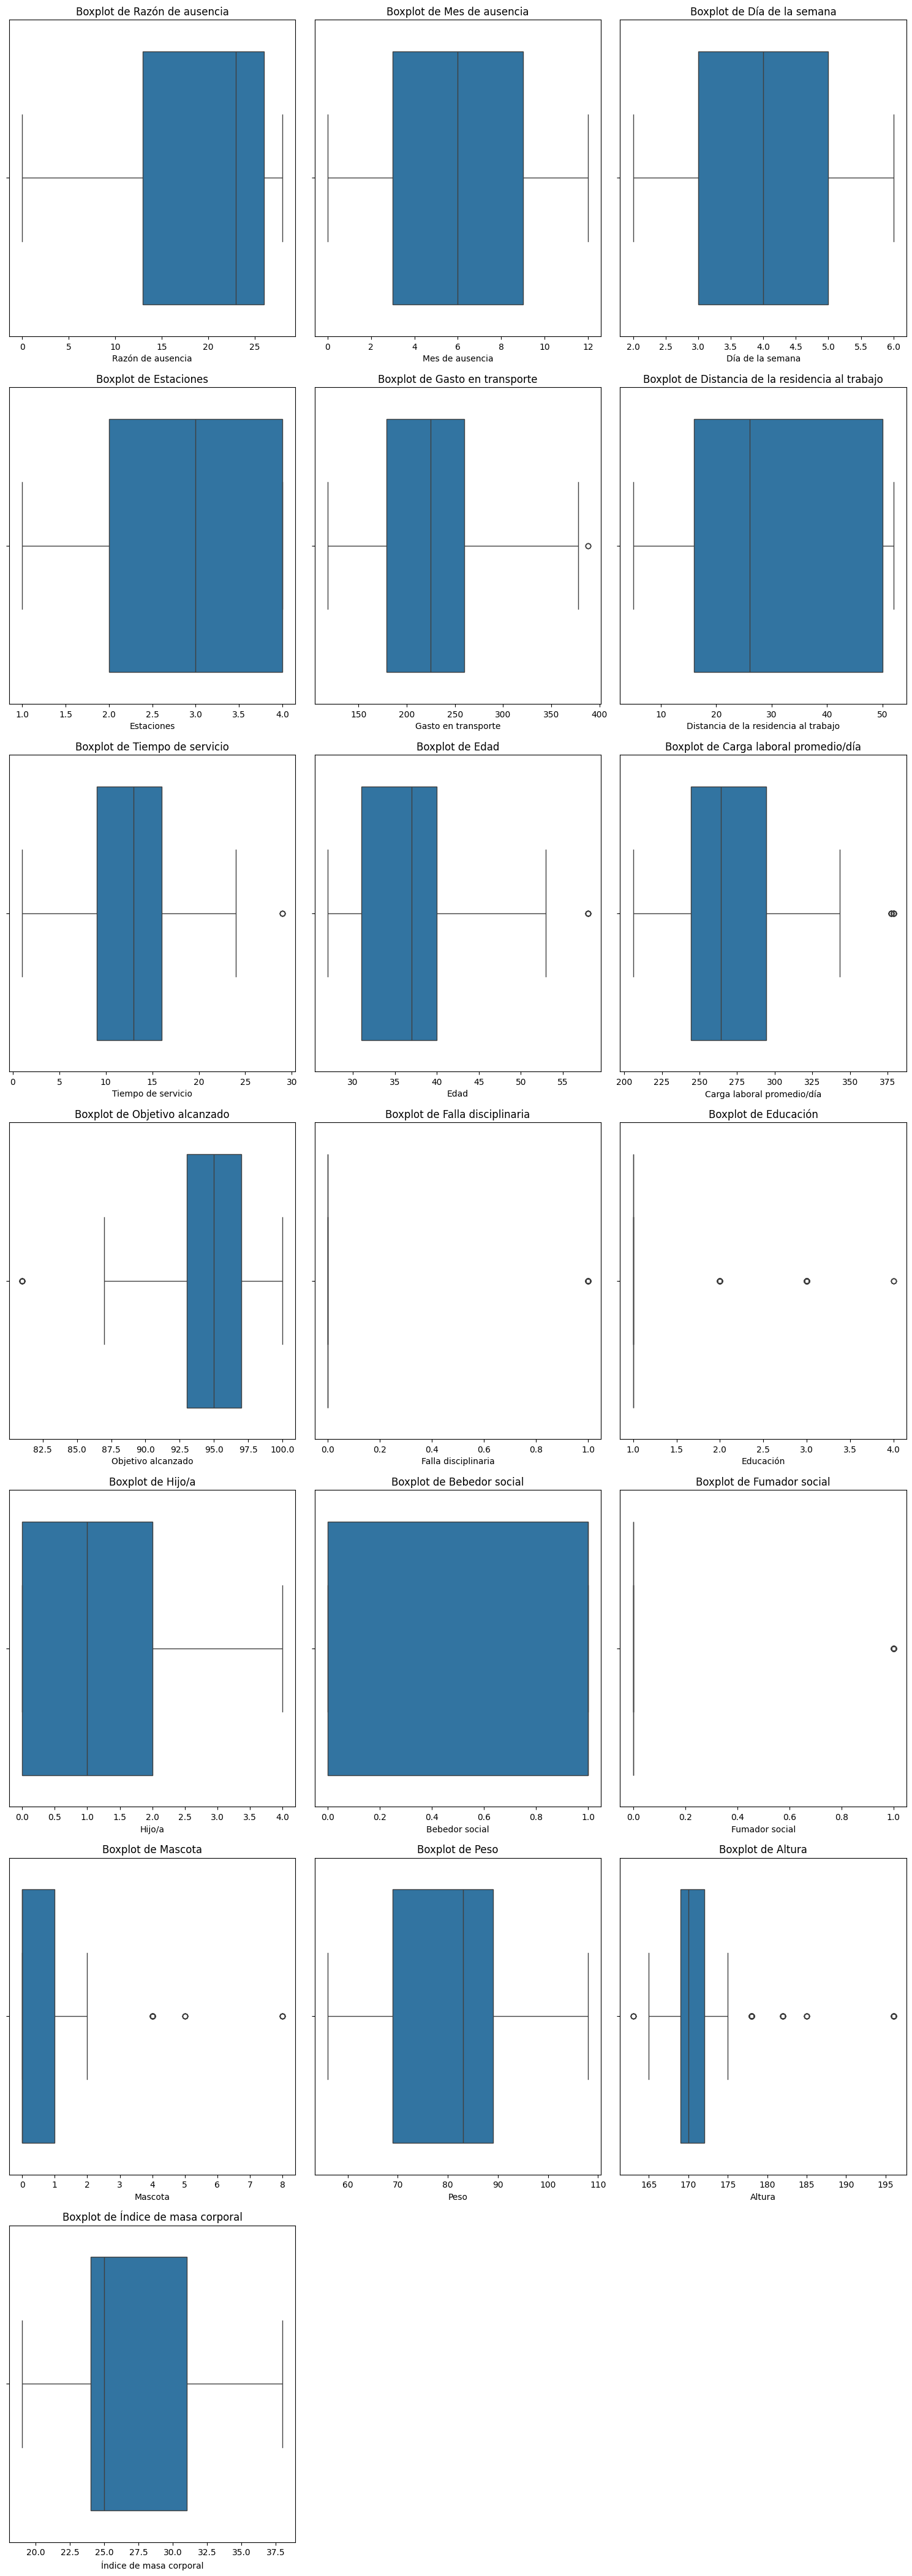

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de variables a graficar
num_features = len(features)  # Lista con nombres de las variables
num_cols = 3  # Número de columnas
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de índice
axes = axes.flatten()

# Iterar sobre cada variable y graficar su boxplot
for i, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f"Boxplot de {feature}")

# Ocultar subgráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gráficos sobrantes

plt.tight_layout()
plt.show()


En la visualización de los gráficos se pueden observar valores atípicos pero que cumple con los parametros informados y estudiados, por lo que no será necesario quitar esos outliers ya que pueden presentar una información valiosa como el hallazgo de nuevos insight.

### 2.3 Gráficos de dispersión (scatterplots)

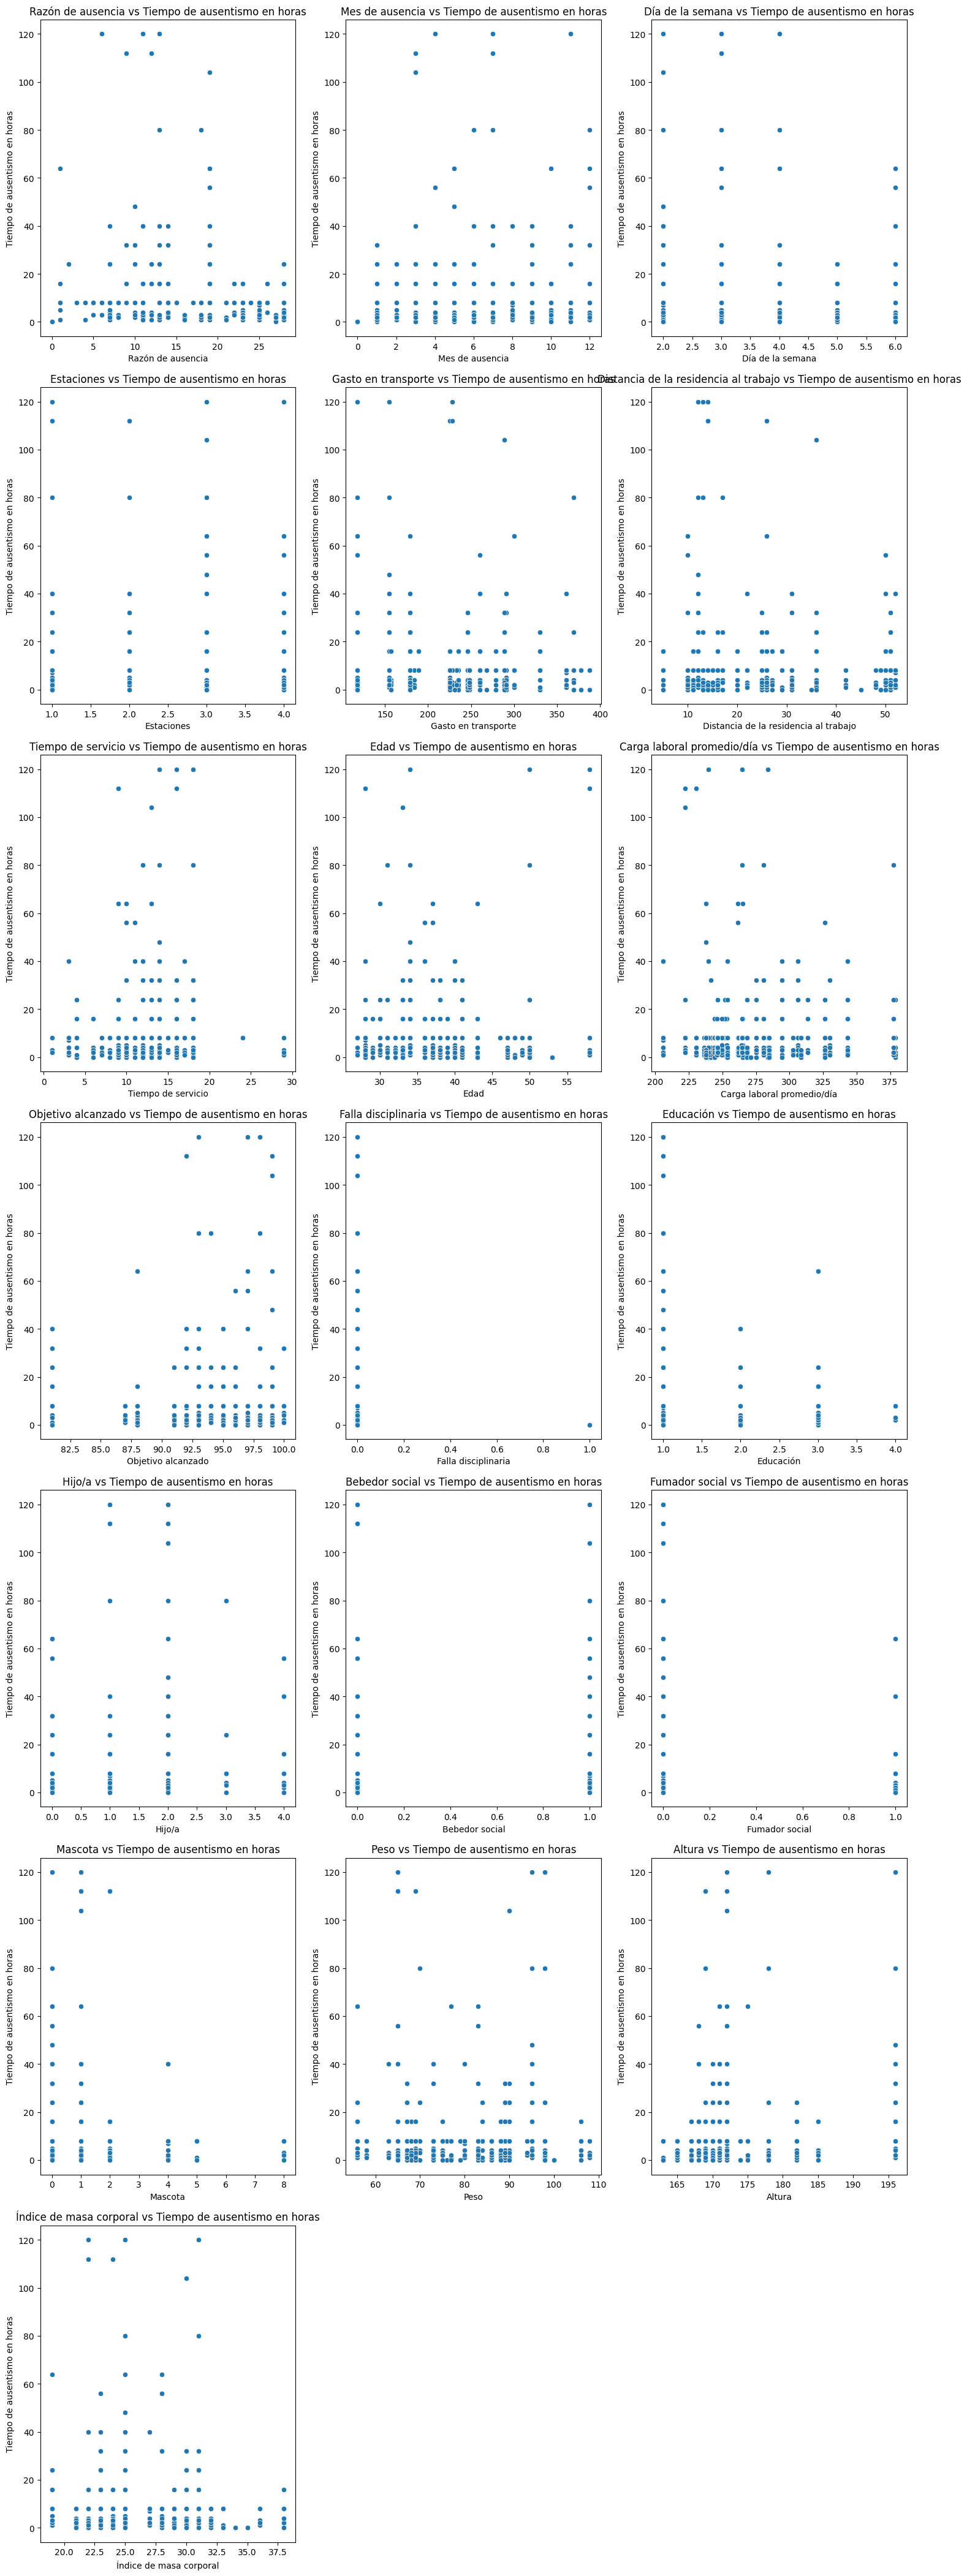

In [8]:
# Contar la cantidad de características a graficar
num_features = len(features)  # 19 características
num_cols = 3  # Número de columnas fijo
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgráficos ajustados
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de índice
axes = axes.flatten()

# Iterar sobre cada feature y graficarla
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}")

# Ocultar subgráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gráficos sobrantes

plt.tight_layout()
plt.show()


## Resolución:

***Target = Tiempo de ausentismo en horas***

*   **Razón ausencia vs Target =** Los casos de enfermedades que se encuentran
entre 10 y 20 suelen tener mas tiempo de ausencia que el resto.

*   **Mes de ausencia vs Target =** Entre los meses Marzo y Diciembre se registar que tienen ausencia de entre 20 a 80 horas.

*   **Día de la semana vs Target =** Los dias lunes, martes y miércoles suelen tener mas faltas acumulando hasta 120 horas.

*   **Estaciones vs target =** Considerando solo 4 puntos en estaciones, deduzco que se refiere a las estaciones del año y se visualiza que en otoño(3) tiempo del Norte, suceden mas horas de ausencia que en las otras estaciones.

*   **Gasto en trasporte vs Target =** los que tienen bajo gasto en transporte sueles tener mas tiempo de ausentismo.

*   **Distancia de la residencia vs Target =** Los que viven a menor distancia de la residencia suelen llegar mas tarde aumentando el ausentismo.

*   **Tiempo de servicio vs Target =** los que tienen entre 8 y 18 años de servicio suelen tener más tiempo en ausentismo.

*   **Edad vs Target =** Los que tienen entre 30 y 38 años de edad suelen tener mas tiempo de ausentismo.

*   **Carga laboral vs Target =** Los que tienen poca carga laboral suelen tener mayor ausentismo.

*   **Objetivo alcanzado vs Target =** Los que cumplen el objetivo entre 92% y 100%, tienen mas ausentismo.

*   **Fallas disciplinarias vs Target =** Los que no tienen fallas disciplinarias tienden a tener mas ausentismo.

*   **Educación vs Target =** Los que solo han terminado la secundaria tienen mayor ausencia.

*   **Hijos vs Target =** Los que tienen entre 1 y 2 hijos suelten tener mas ausencia.

*   **Fumador Social vs Target =** El Fumador ligeramente suele tener mas ausencia que uno que no.

*   **Mascotas vs Target =** Los que tienen hasta una mascota suelen tener mas ausencia.

*   **Peso vs Target =** Los que pesan 70 y 100 kilos tiene un aumento en ausencia.

*   **Altura vs Target =** Los que miden entre 168 y 180 tienen mas ausencia, pero se deduce que la estatura media es la mencionada.

*   **Indice de masa corporal vs Target =** Los que tienen entre 21 y 30 de IMC, suelen tener mas ausencia.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## 3.1 Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).

In [9]:
df.isnull().sum()

,0
Id,0
Razón de ausencia,0
Mes de ausencia,0
Día de la semana,0
Estaciones,0
Gasto en transporte,0
Distancia de la residencia al trabajo,0
Tiempo de servicio,0
Edad,0
Carga laboral promedio/día,0


⚓ No hay valores nulos para imputar

## 3.2 Correlación de features

Tiempo de ausentismo en horas    1.000000
Altura                           0.144420
Hijo/a                           0.113756
Falla disciplinaria             -0.124248
Día de la semana                -0.124361
Razón de ausencia               -0.173116
Name: Tiempo de ausentismo en horas, dtype: float64


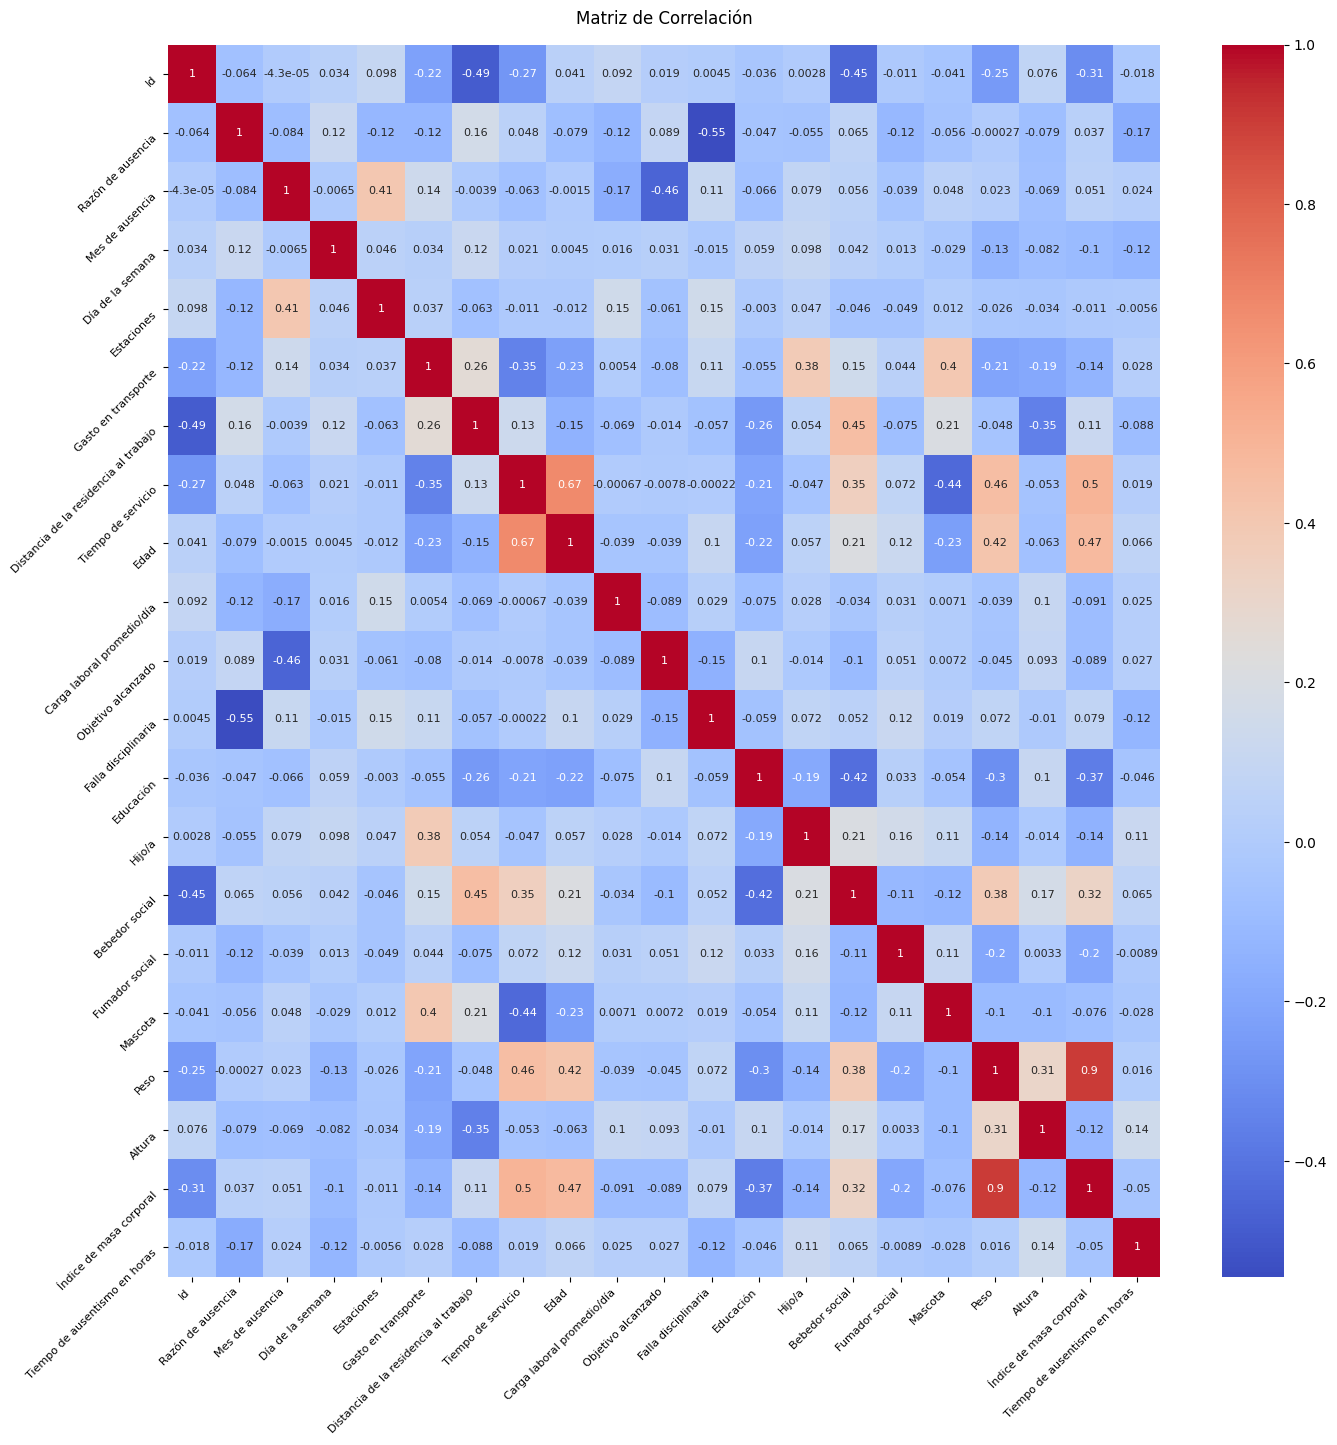

In [10]:
correlation = df.corr()

threshold = 0.1  # Umbral mínimo de correlación
selected_corr = correlation[abs(correlation["Tiempo de ausentismo en horas"]) > threshold]["Tiempo de ausentismo en horas"]
print(selected_corr.sort_values(ascending=False))

plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados
plt.show()

Se realizó una correlación para ver la significancia de cada feature y se visualiza que aunque los valores sean muy bajos y muy pocas features tengan mayor correlación ya sea positiva o negativa, hay variables que tienen poco peso, pero influeyen en otras mas importantes.

In [11]:
# Eliminación de variables innecesarias
df.drop(columns=['Id', 'Falla disciplinaria', 'Bebedor social', 'Fumador social'], inplace=True)

## 3.2 Limpieza: indique cuáles features descarta. Justifique.

✅ Eliminé la feature "Id", ya que no tiene sentido mantener un numero identificatorio que no influye en absoluto en el dataset.

✅ Falla disciplinaria, Bebedor social y Fumador social, las eliminé porque en en la visualización del gráfico de dispersión estas features casi no tienen influencia.

## 3.3 Escalado de features aplizando Z-Score

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# Seleccionar las columnas a escalar
features = df
# Aplicar StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Ver las primeras filas escaladas
features_scaled[:1]

array([[ 0.80493838,  0.19676258, -0.64394734, -1.3901746 ,  1.01140838,
         0.42955567,  0.10176977, -0.53286845, -0.81821241,  0.63868581,
        -0.43385741,  0.89372277,  0.19284983,  0.85167289, -0.01904601,
         0.77593223, -0.21951111]])

👍 Normalicé los datos con Z-score para que los clusters no se vean afectados por rangos muy distintos.




## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

## 4.1.1 Determine el número ideal de clústers usando Silhoutte Score.

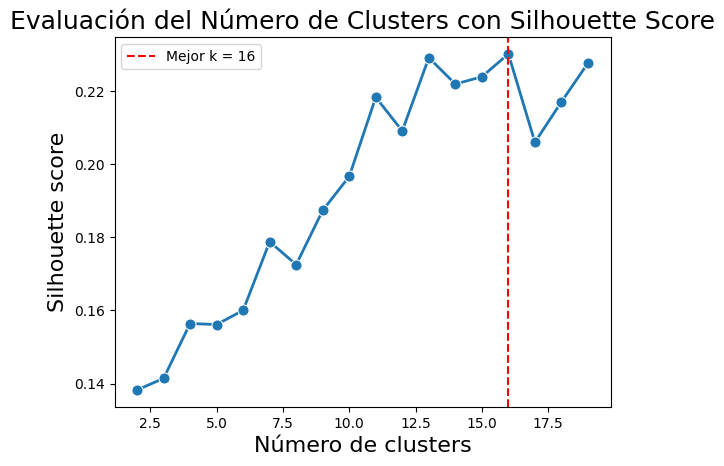

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples
import numpy as np

# Lista para almacenar los valores del Silhouette Score
sil = []

# Definir el rango de valores de k (número de clusters) a evaluar
k_values = range(2, 20)

# Iterar sobre diferentes valores de k para calcular el Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=1)  # Se aumenta n_init a 30 repeticiones para mayor estabilidad
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)  # Se calcula el Silhouette Score
    sil.append(score)

# Identificar el mejor número de clusters (k con mayor Silhouette Score)
best_k = k_values[np.argmax(sil)]  # Encuentra el índice del valor máximo y obtiene el mejor k


# Graficar los resultados del Silhouette Score para cada número de clusters
sns.lineplot(x=k_values, y=sil, marker='o', linewidth=2, markersize=8, legend=False)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor k = {best_k}')  # Línea roja indicando el mejor k
plt.legend()
plt.ylabel('Silhouette score', fontsize=16)
plt.xlabel('Número de clusters', fontsize=16)
plt.title("Evaluación del Número de Clusters con Silhouette Score", fontsize=18)
plt.show()

 ⚡ Silhoutte Score sugiere que la cantidad ideal de cluster sea de 16, debe ser por la alta dimencionalidad ya que los datos aunque estan estandarizados, no tienen una distribución normal y son 20 features que se estan analizando, por lo que voy a aplicar PCA para la reducción de dimencionalidad.

## 4.1.2 Aplique K-means sobre los datos procesados del grupo anterior.

In [15]:
# Aplicar K-Means con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=16, n_init=30, random_state=1)
kmeans_final.fit(features_scaled)

# Obtención de etiquetas y coordenadas de centroides
labels = kmeans_final.labels_ # Etiquetas de los clusters asignadas a cada punto
centroids = kmeans_final.cluster_centers_ # Coordenadas de los centroides de los grupos

In [16]:
# Evaluación del modelo: Cálculo del puntaje de silueta
silhouette_avg = silhouette_score(features_scaled, labels)
print(f'Puntaje de silueta: {silhouette_avg:.4f}')

Puntaje de silueta: 0.2302


El puntaje de la silueta al aplicar k-means es muy bajo por lo que el modelo no esta sabiendo agrupar correctamente los datos, solo agrupa correctamente el 23% de todos los datos.

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

## 4.2.1 distribución de observaciones por cluster

## Gráfico de barras de los clusters

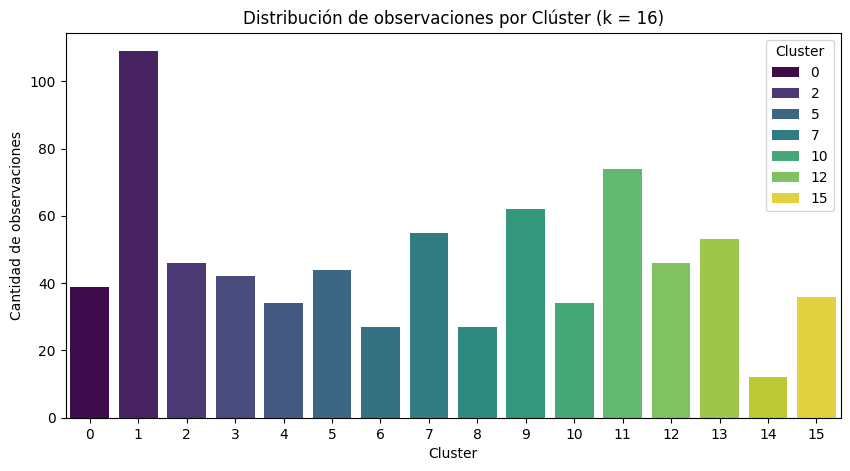

In [17]:
# Agregar a las observaciones originales sus labels correspondientes
features_labels = features.copy()
features_labels["Cluster"] = labels

# Contar número de observaciones por clúster
cluster_counts = features_labels["Cluster"].value_counts().sort_index()

# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de observaciones")
plt.title(f"Distribución de observaciones por Clúster (k = {len(cluster_counts)})")
plt.show()



- Se creo un gráfico de barras para ver la cantidad aproximada de observaciones que hay en cada cluster.

## Gráfico Boxplot de los Clusters

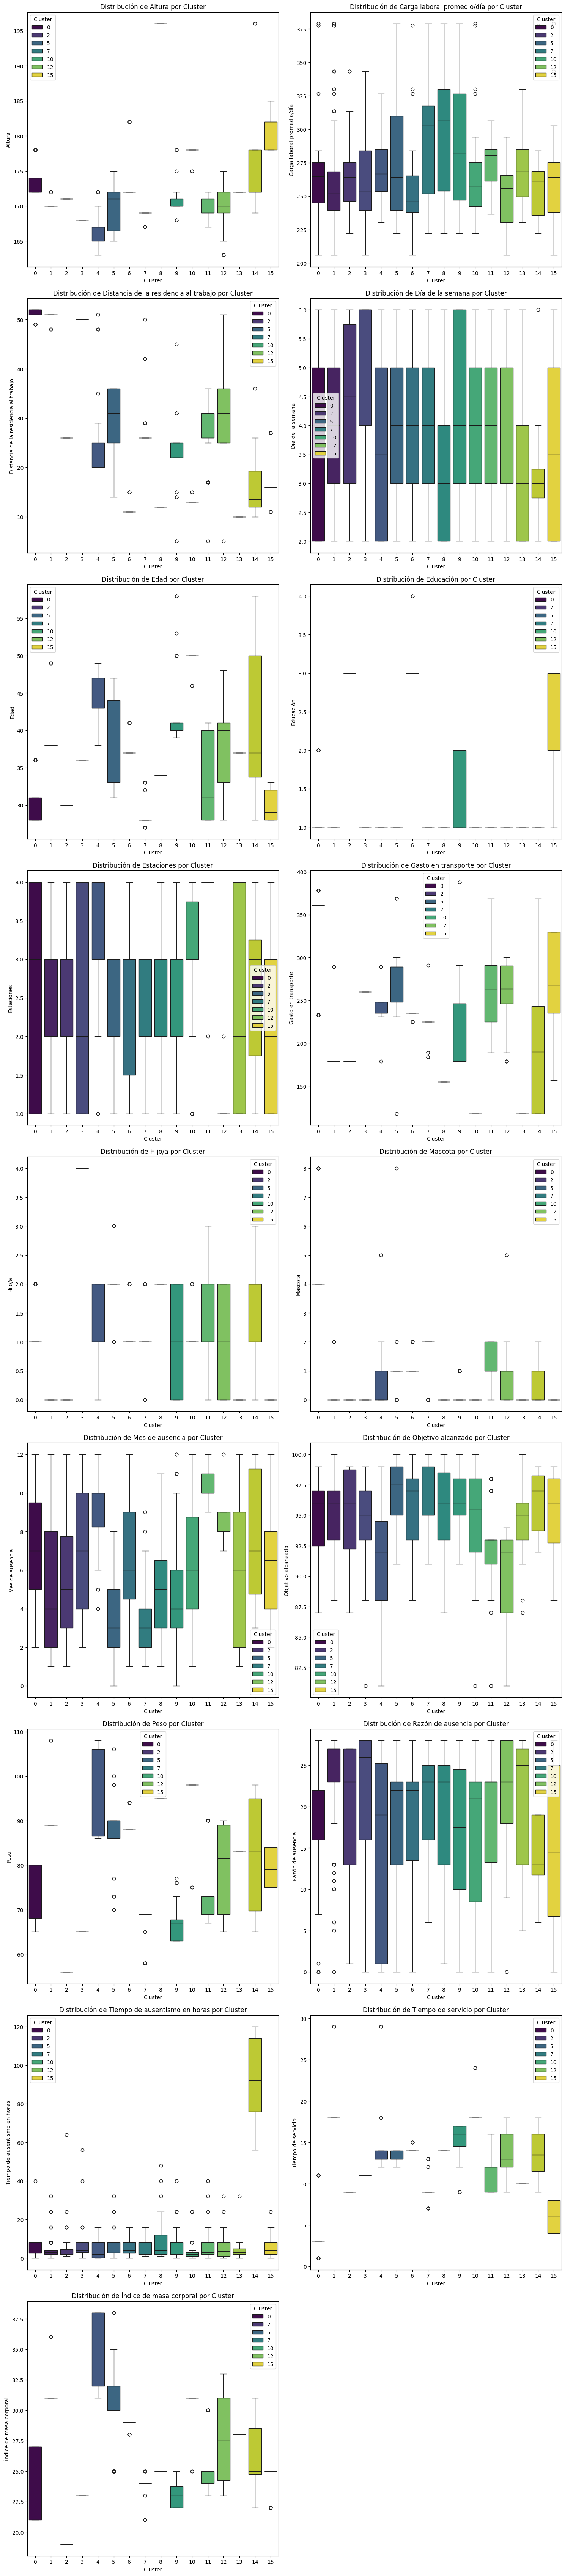

In [18]:
# Obtener todas las columnas excepto 'Cluster'
features_plot = features_labels.columns.difference(["Cluster"])

# Crear boxplots para cada variable dentro de los clusters
plt.figure(figsize=(15, len(features_plot) * 4))  # Ajusta el tamaño de la figura dinámicamente

for i, feature in enumerate(features_plot):
    plt.subplot(len(features_plot) // 2 + 1, 2, i + 1)
    sns.boxplot(x="Cluster", y=feature, hue="Cluster", data=features_labels, palette="viridis")
    plt.title(f"Distribución de {feature} por Cluster")

plt.tight_layout()
plt.show()



 ## ¿Cuáles son sus características / distribución?

 - ✍ Se observa mucha variabilidad en los datos en cada feature.

 - ✍ Se observa que los valores de cada cluster esta muy dispersa, considerando el tamaño de las cajas.

 - ✍ Tiempo de ausentismo en horas se ve que tuviera una distribución normal.


## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

In [19]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [20]:
from sklearn.decomposition import PCA

## PCA 2D

In [21]:
# Aplicar PCA con un número de componentes
pca_full = PCA(n_components=2)
x_pca_full = pca_full.fit_transform(features_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)  # Varianza acumulada

# Imprimir la varianza explicada por cada uno de los componentes principales
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}")

# También mostramos el total acumulado
print(f"Varianza total explicada (2D): {round(total_variance[-1] * 100, 4)}")

Varianza explicada por PC1: 18.3601
Varianza explicada por PC2: 12.074
Varianza total explicada (2D): 30.4341


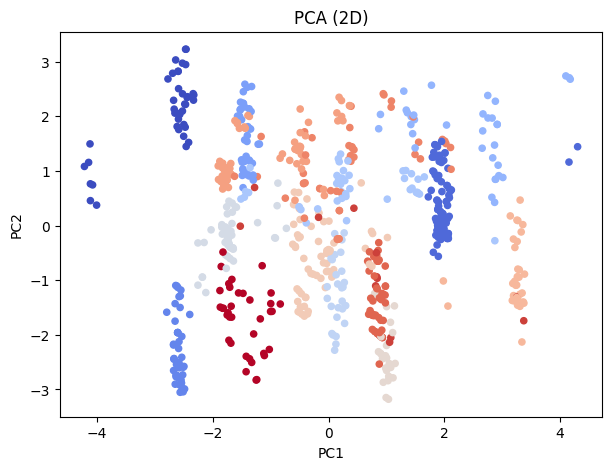

In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(x_pca_full[:, 0], x_pca_full[:, 1], c=labels, cmap='coolwarm', s=20)
plt.title('PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- Se visualiza que solo el 30.4% de toda la información esta representada en estos 2 componentes, no siendo un porcentaje óptimo.

## PCA 3D



In [23]:
# Aplicar PCA con un número de componentes
pca_full = PCA(n_components=3)
x_pca = pca_full.fit_transform(features_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)  # Varianza acumulada

# Imprimir la varianza explicada por cada uno de los componentes principales
for i in range(len(explained_variance)):
    print(f"Varianza explicada por PC{i+1}: {round(explained_variance[i] * 100, 4)}")

# También mostramos el total acumulado
print(f"Varianza total explicada (3D): {round(total_variance[-1] * 100, 4)}")

Varianza explicada por PC1: 18.3601
Varianza explicada por PC2: 12.074
Varianza explicada por PC3: 10.1581
Varianza total explicada (3D): 40.5922


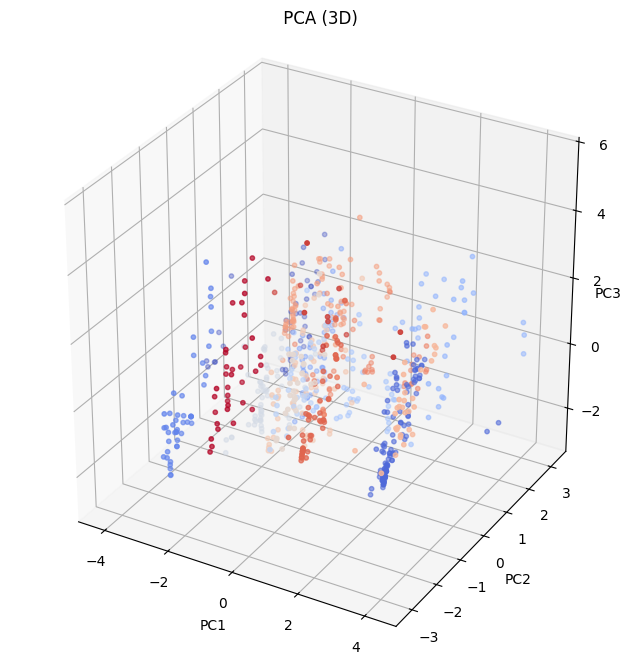

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
sc = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=labels, cmap='coolwarm', s=10)
ax.set_title(' PCA (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', labelpad=-4)
plt.show()

- Se visualiza que PCA con 3 componentes solo representa el 40.6% de todos los datos, lo que aun sigue siendo bajo el porcentaje.

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

## 5.2.1. Volver a evaluar el número optimo de clusters

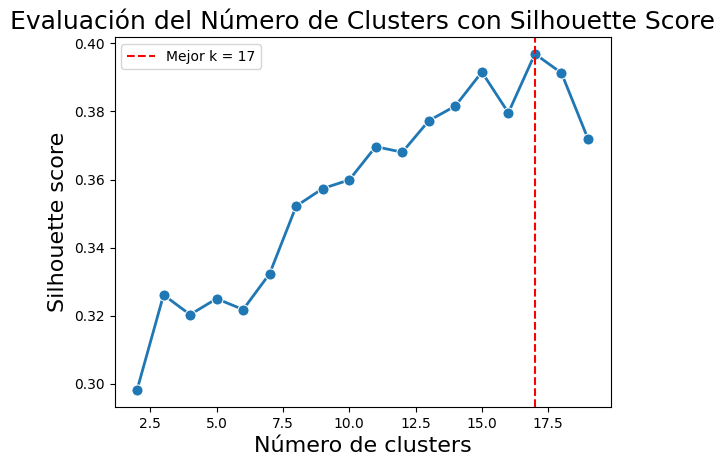

In [25]:
# Lista para almacenar los valores del Silhouette Score
sil = []

# Definir el rango de valores de k (número de clusters) a evaluar
k_values = range(2, 20)

# Iterar sobre diferentes valores de k para calcular el Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=1)  # Se aumenta n_init a 20 para mayor estabilidad
    kmeans.fit(x_pca)
    score = silhouette_score(x_pca, kmeans.labels_)  # Se calcula el Silhouette Score
    sil.append(score)

# Identificar el mejor número de clusters (k con mayor Silhouette Score)
best_k = k_values[np.argmax(sil)]  # Encuentra el índice del valor máximo y obtiene el mejor k


# Graficar los resultados del Silhouette Score para cada número de clusters
sns.lineplot(x=k_values, y=sil, marker='o', linewidth=2, markersize=8, legend=False)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Mejor k = {best_k}')  # Línea roja indicando el mejor k
plt.legend()
plt.ylabel('Silhouette score', fontsize=16)
plt.xlabel('Número de clusters', fontsize=16)
plt.title("Evaluación del Número de Clusters con Silhouette Score", fontsize=18)
plt.show()

Esta vez Silhoutte score evaluó el numero de clusters en 17 como mas óptimo.



## 5.2.2. Aplicación de  k-means

Puntaje de silueta: 0.3969


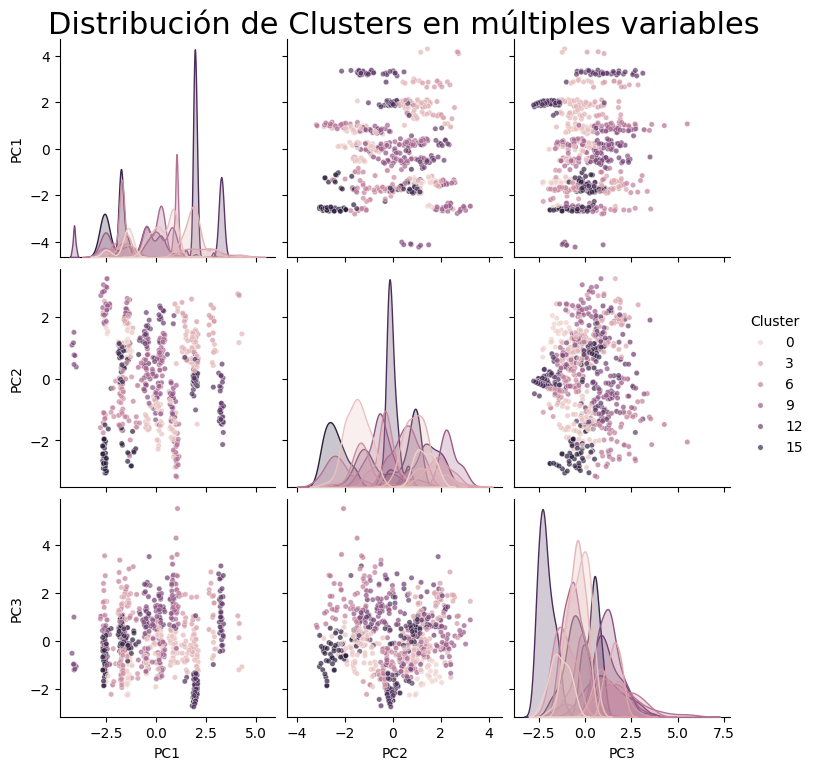

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Means con el número óptimo de clusters
kmeans_final = KMeans(n_clusters=17, n_init=20, random_state=1)
kmeans_final.fit(x_pca)

# Obtención de etiquetas y coordenadas de centroides
labels = kmeans_final.labels_ # Etiquetas de los clusters asignadas a cada punto
centroids = kmeans_final.cluster_centers_ # Coordenadas de los centroides de los grupos

# Evaluar el puntaje de silueta
silhouette_avg = silhouette_score(x_pca, labels)
print(f'Puntaje de silueta: {silhouette_avg:.4f}')

# Convertir a DataFrame y agregar la columna de clusters
x_pca_full = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3'])  # Asegurar que es un DataFrame
x_pca_full["Cluster"] = labels  # Agregar la columna de clusters antes de graficar

# Visualizar con pairplot diferenciando clusters
sns.pairplot(x_pca_full, hue="Cluster", height=2.5, plot_kws={'s': 15, 'alpha': 0.7})
plt.suptitle("Distribución de Clusters en múltiples variables", fontsize=22, y=1.02)
plt.show()


El Puntaje de silueta: 0.3969 subió considerablemente despues de aplicar PCA y posteriormente K-means, por lo que el modelo representa el 40% de todos lo datos, no siendo un modelo óptimo.

## 6- Conclusiones

* observamos los puntajes de la silueta antes (0.2302) y despues (0.3969) de aplicar PCA y hubo un aumento importante en el puntaje, dejando en evidencia que aplicar K-means a este conjunto de datos cumple medianamente con la división por cluster pero aún no logra dividir bien los grupos.

* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?
 - La reducción de dimensionalidad mejoró significativamente el modelo, el modelo solo podía captar el 20% sin PCA y al aplicarle reducción de dimendionalidad pudo captar el 40% de los datos, lo que tuvo muy bueno resultados en su implementacion.

* El desempeño de K-means, sigue estando por debajo del 50% de un modelo óptimo, por lo que se podría probar con otro modelo de clustering para ver su rendimiento.

* Al ver silhouette score en la primera parte del modelo antes de aplicar PCA, encontraba que la cantidad óptima de clusters era 16 y después de aplicar PCA, silhouette score encontraba como 18 clusters el número óptimo



### Conclusión final

Al ver la variabilidad de los datos y la media de muchos feature estaba en los extremos las cajas de boxplot viendo la asimetría en los datos que pudieron estar sesgados.

Esto pudo haber causado que K-means nos haya logrado crear lo cluster correctamente o que se hayan superpuesto los centroides.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## DBSCAN en dataset completo

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Aplicar StandardScaler
scaler = StandardScaler()
features_scal = scaler.fit_transform(features_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos valores según tu dataset
labels_dbscan = dbscan.fit_predict(features_scal)

# Agregar etiquetas al dataframe
df["Cluster_DBSCAN"] = labels_dbscan

# Ver primeros registros con clúster asignado
df.sample(5)


,Razón de ausencia,Mes de ausencia,Día de la semana,Estaciones,Gasto en transporte,Distancia de la residencia al trabajo,Tiempo de servicio,Edad,Carga laboral promedio/día,Objetivo alcanzado,Educación,Hijo/a,Mascota,Peso,Altura,Índice de masa corporal,Tiempo de ausentismo en horas,Cluster_DBSCAN
310,10,10,2,4,361,52,3,28,265.017,88,1,1,4,80,172,27,8,-1
75,14,10,3,4,291,31,12,40,253.465,93,1,1,1,73,171,25,8,-1
712,19,6,6,3,233,51,1,31,275.089,96,2,1,8,68,178,21,8,-1
563,26,12,6,4,235,20,13,43,280.549,98,1,1,0,106,167,38,8,-1
331,12,11,6,4,291,31,12,40,284.031,97,1,1,1,73,171,25,4,-1


In [28]:
# Contar cuántos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["Cluster_DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")


Total de puntos considerados ruido (-1): 725


In [29]:
# Contar la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Número de clústeres encontrados: {num_clusters}")

Número de clústeres encontrados: 17


Se ve que hay 725 observaciones que DBSCAN los considero ruido de 740 datos totales del dataset, por lo que DBSCAN no funciona bien en este conjunto de datos.

## DBSCAN en Dataset Reducido

In [30]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x_pca)

# Agregar etiquetas al dataframe
df["DBSCAN"] = labels_dbscan

# Ver primeros registros con clúster asignado
df.sample(5)


,Razón de ausencia,Mes de ausencia,Día de la semana,Estaciones,Gasto en transporte,Distancia de la residencia al trabajo,Tiempo de servicio,Edad,Carga laboral promedio/día,Objetivo alcanzado,Educación,Hijo/a,Mascota,Peso,Altura,Índice de masa corporal,Tiempo de ausentismo en horas,Cluster_DBSCAN,DBSCAN
288,13,9,2,4,179,51,18,38,294.217,81,1,0,0,89,170,31,8,-1,-1
502,23,9,2,1,179,51,18,38,261.756,87,1,0,0,89,170,31,4,-1,2
83,21,11,5,4,179,22,17,40,306.345,93,2,2,0,63,170,22,8,-1,-1
16,23,7,6,1,179,51,18,38,239.554,97,1,0,0,89,170,31,2,-1,2
564,18,12,2,4,233,51,1,31,280.549,98,2,1,8,68,178,21,8,-1,-1


In [31]:
# Contar cuántos registros tienen -1 en "Cluster_DBSCAN"
ruido_total = (df["DBSCAN"] == -1).sum()

print(f"Total de puntos considerados ruido (-1): {ruido_total}")

Total de puntos considerados ruido (-1): 139


In [32]:
# Contar la cantidad de clusters (excluyendo el ruido)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Número de clústeres encontrados: {num_clusters}")

Número de clústeres encontrados: 17


Se ve que hay 139 observaciones que DBSCAN los considero ruido de 740 datos totales del dataset, por lo que DBSCAN andubo mejor con con los datos reducidos que con el dataset completo

## Conclusión:

vemos que al aplicar DBSCAN al conjunto de datos completo DBSCAN considero casi la totalidad de los datos como ruido a diferencia de de haber aplicado DBSCAN al dataset reducido que solo considero 139 observaciones como ruido, tgenerando asi 17 cluster que DBSCAN pudo encontrar en el set de datos. dejando como óptimo el modelo de DBSCAN aplicado a los datos reducidos.

Se podria seguir analizando los cluster para ver la cantidad de observaciones que tiene cada uno y que feature predomina en cada uno para ver si se encuentran nuevas variables o patrones ocultos.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

# Referencias

Mencione los recursos utilizados